In [2]:
import numpy as np
import pandas as pd
X = pd.read_csv('tree_class_feats.csv')
y = pd.read_csv('tree_class_target.csv')
# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the Dataset =  10000
Number of Features for each example =  10
Possible Output Classes =  [0 1]


In [3]:
from keras.models import Sequential
model=Sequential()

Using TensorFlow backend.


In [16]:
from keras.layers import Dense, Activation
model.add(Dense(10, activation='tanh',input_dim=X.shape[1]))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 252
Trainable params: 252
Non-trainable params: 0
________________________________________________________

In [17]:
hist = model.fit(X,y,batch_size=5,epochs=10,validation_split=0.2,verbose=1,shuffle=False)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 322us/step - loss: 0.2486 - accuracy: 0.9408 - val_loss: 0.1969 - val_accuracy: 0.9280
Epoch 2/10
8000/8000 [==============================] - 2s 293us/step - loss: 0.1774 - accuracy: 0.9385 - val_loss: 0.1891 - val_accuracy: 0.9265
Epoch 3/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.1731 - accuracy: 0.9391 - val_loss: 0.1901 - val_accuracy: 0.9275
Epoch 4/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.1697 - accuracy: 0.9408 - val_loss: 0.1892 - val_accuracy: 0.9260
Epoch 5/10
8000/8000 [==============================] - 2s 283us/step - loss: 0.1678 - accuracy: 0.9399 - val_loss: 0.1895 - val_accuracy: 0.9265
Epoch 6/10
8000/8000 [==============================] - 2s 283us/step - loss: 0.1663 - accuracy: 0.9396 - val_loss: 0.1910 - val_accuracy: 0.9270
Epoch 7/10
8000/8000 [==============================] - 2s 279us/step - loss

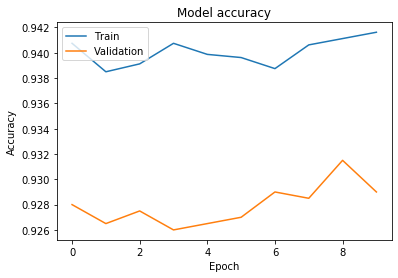

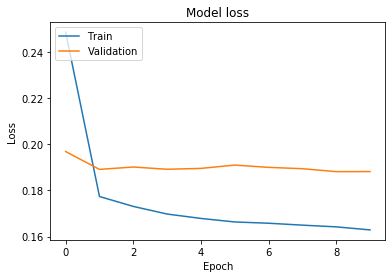

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
y_predicted = model.predict(X.iloc[0:10,:])
print("Predicted value:")
print(np.round(y_predicted) == y.iloc[0:10,:])

Predicted value:
   Class
0   True
1   True
2   True
3   True
4   True
5   True
6  False
7   True
8   True
9   True
